In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']=(6,4)

# 1- Simple Function

In [6]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2- Linear Regression with One Variable

In [10]:
data = pd.read_csv('ex1data1.txt', header=None)
data = data.values

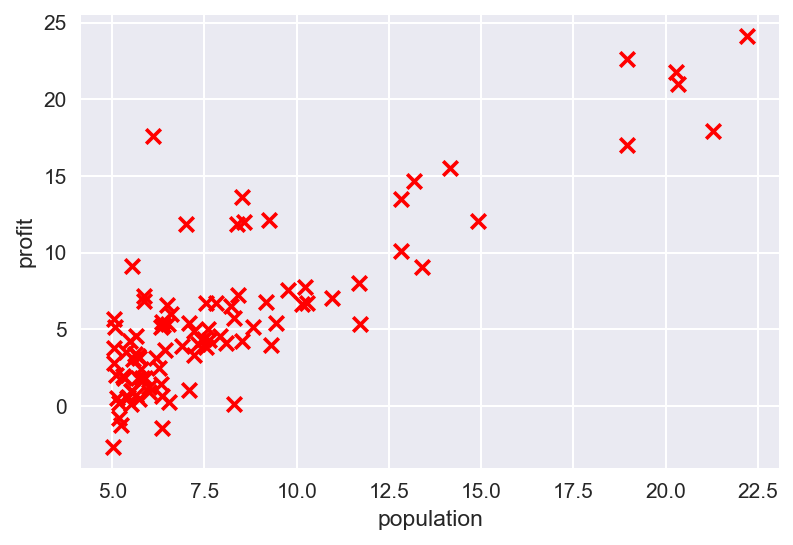

In [11]:
plt.scatter(data[:, 0], data[:, 1], color='r', marker='x')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [12]:
from numpy import linalg as LA


def cost(X, theta, Y):
    m = len(Y)
    return 1./2/m*LA.norm((np.dot(X, theta)-Y), 2)**2


X = np.ones((data.shape[0],))
X = np.stack((X, data[:, 0]), axis=-1)
theta = np.zeros((2))
Y = data[:, 1]
iterations = 1500
alpha = 0.01
cost(X, theta, Y)

32.072733877455676

In [13]:
def graddec(X, theta, Y, alp, nIter):
    m = len(Y)
    c = np.array([])
    for i in np.arange(nIter):
        c = np.append(c, cost(X, theta, Y))
        theta = theta-alp/m*np.dot(X.transpose(), (np.dot(X, theta)-Y))
    return theta, c


theta_, c = graddec(X, theta, Y, alpha, iterations)

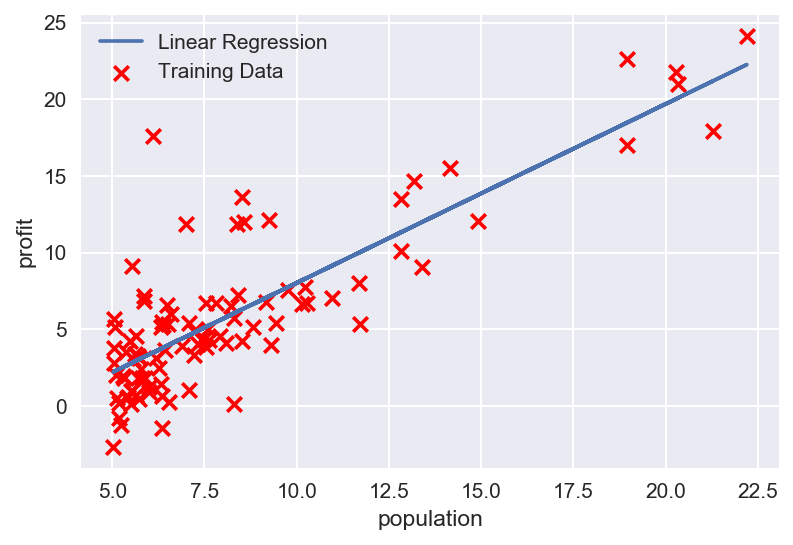

In [14]:
plt.scatter(data[:, 0], data[:, 1], color='r',
            marker='x', label='Training Data')
plt.plot(data[:, 0], np.dot(X, theta_), label='Linear Regression')
plt.xlabel('population')
plt.ylabel('profit')
plt.legend()
plt.show()

In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
thetas = np.matrix([theta0_vals[0]*np.ones((100)), theta1_vals])
for i in range(99):
    thetas = np.hstack(
        (thetas, np.matrix([theta0_vals[i+1]*np.ones((100)), theta1_vals])))

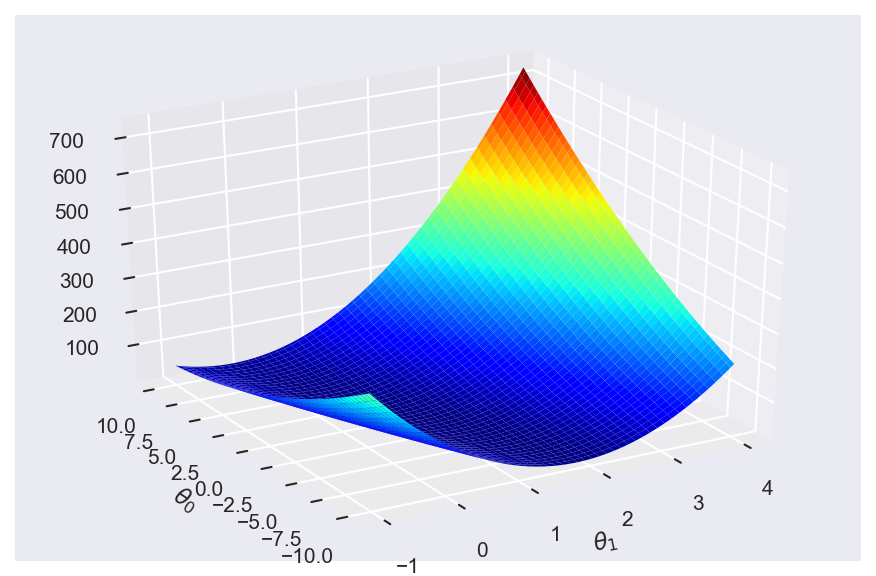

In [30]:
from mpl_toolkits.mplot3d import Axes3D
costs = 1./2/len(Y)*LA.norm((np.dot(X, thetas).T-Y), ord=2, axis=1)**2
costs = costs.reshape((100, 100))
theta0, theta1 = np.meshgrid(theta1_vals, theta0_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, costs, cmap='jet')
ax.view_init(30, -1200)
plt.tight_layout()
ax.set_ylabel(r'$\theta_0$')
ax.set_xlabel(r'$\theta_1$')
plt.show()

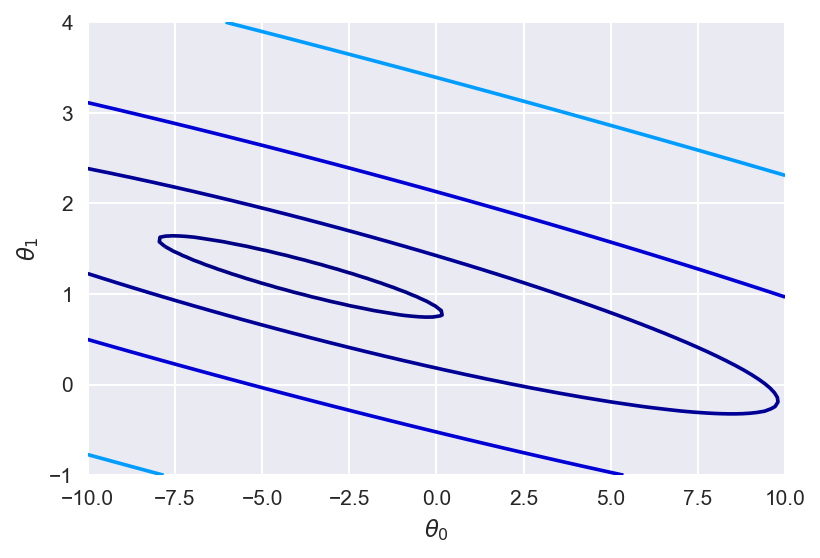

In [29]:
plt.contour(theta1, theta0, costs, np.logspace(-2, 3, 10), cmap='jet')
plt.ylabel(r'$\theta_1$')
plt.xlabel(r'$\theta_0$')
plt.show()

# 3- Linear Regression with Multiple Vriables

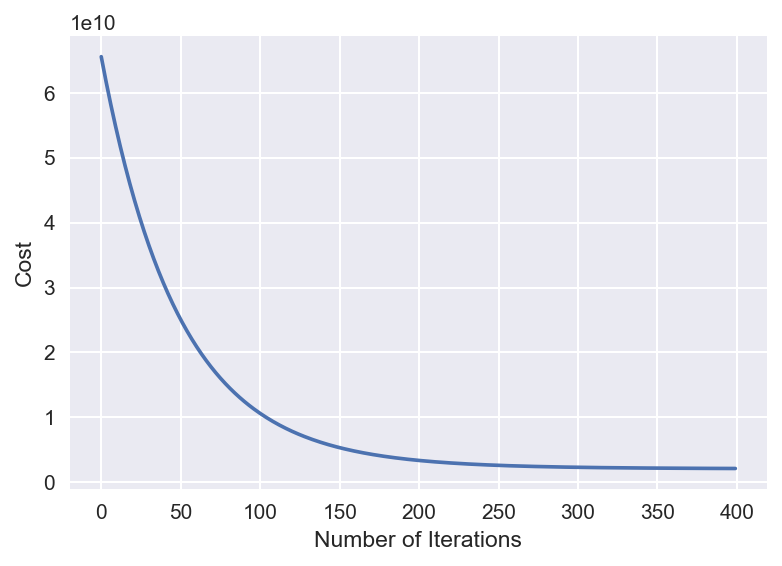

In [18]:
data2 = pd.read_csv('ex1data2.txt', header=None)
data2 = np.matrix(data2.values)
train = data2[:, 0:2]
Y = data2[:, 2]
mean = np.mean(train, axis=0)
std = np.std(train, axis=0)
train = (train-mean)/std
train = np.hstack((np.ones((len(train), 1)), train))
iterat = 400
alp = 0.01
theta = np.zeros((3, 1))
a, c = graddec(train, theta, Y, alp, iterat)
plt.plot(c)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()